# **Quantium Virtual Intership - Data Analytics**

---



## Project Background

Category Manager for Chips(A Chips Making Company) wants to better understand the types of customers who purchase Chips and their purchasing behaviour within the region.

The insights from this analysis will feed into the supermarket’s strategic plan for the chip category in the next half year.

---



### Task Breakdown
1. Examine & Explore the data
2. Clean up the data 
3. Analyse customer segments – Define the metrics. Look at total sales, drivers of sales, where the highest sales are coming from etc. Explore the data, create charts and graphs as well as noting any interesting trends and/or insights.
4.Deep dive into customer segments – define recommendation from the insights, determine which segments client should be targeting, if packet sizes are relative and form an overall conclusion based on your analysis. 


In [1]:
### Importing Necesary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests 
import os

%matplotlib inline

#### The transaction data is a bit large so to simplify loading it into the notebook, it's more effiecient to programatically load it from github, using the request library.

In [2]:
url_data = 'https://github.com/idowujames/Quantium-Virtual-Intership/blob/main/QVI_transaction_data.xlsx?raw=true'

r_data = requests.get(url_data)

with open ('QVI_transaction_data.xlsx', 'wb') as file:
  file.write(r_data.content)

In [3]:
### Loading the dataframe 

df_trans = pd.read_excel('QVI_transaction_data.xlsx')

df_trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


### Exploring the QVI transaction data

In [4]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


### Structure of the dataset

> This dataset consist of **264,836** entries with **8** columns

> There are no missing values in the observations but some of the columns are not in optimised datatypes for analysis.

In [5]:
df_trans.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


## Getting the number of stores, customers and products in the data to get a better understanding of the dataset

In [6]:
# Checking for number of unique stores in the data
df_trans['STORE_NBR'].nunique()

272

In [7]:
# Checking for number of unique customers in the data
df_trans['LYLTY_CARD_NBR'].nunique()

72637

In [8]:
# Checking for number of unique products in the data
print(df_trans['PROD_NAME'].nunique())

print('--------------')

# Checking if the unique number of product_NAME matches the number of product_NBR
df_trans['PROD_NAME'].nunique() == df_trans['PROD_NBR'].nunique()

114
--------------


True

In [9]:
df_trans['TXN_ID'].nunique()

263127

> There are **272 stores**, **114 Products** and **72,637 Customers** in this dataset

In [10]:
df_trans.sample(16)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
162332,43485,150,150249,149540,14,Smiths Crnkle Chip Orgnl Big Bag 380g,2,11.8
137028,43616,25,25010,21655,62,Pringles Mystery Flavour 134g,2,7.4
77448,43463,183,183100,185402,35,Woolworths Mild Salsa 300g,2,3.0
171606,43543,270,270240,268210,83,WW D/Style Chip Sea Salt 200g,2,3.8
208891,43351,101,101125,100753,111,Smiths Chip Thinly Cut Original 175g,2,6.0
94301,43295,199,199012,197613,90,Tostitos Smoked Chipotle 175g,2,8.8
216532,43388,269,269036,265206,70,Tyrrells Crisps Lightly Salted 165g,2,8.4
194333,43322,125,125137,128811,99,Pringles Sthrn FriedChicken 134g,2,7.4
248475,43457,133,133211,137407,64,Red Rock Deli SR Salsa & Mzzrlla 150g,2,5.4
112641,43536,196,196071,195868,22,Thins Chips Originl saltd 175g,2,6.6


### Checking for error entries or outliers in the dataset

In [11]:
# Checking if there are errors in the products thats were captures
# We are only interested in chips and not any other products

df_trans['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

### *It appears not all the products in the dataset are chips. Some appear to be salsa sour*

In [12]:
# Checking out entries in the dataset that are salsa

salsa = df_trans[df_trans['PROD_NAME'].str.lower().str.contains('salsa')]

salsa

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
25,43600,39,39144,35506,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
32,43605,45,45127,41122,64,Red Rock Deli SR Salsa & Mzzrlla 150g,2,5.4
44,43330,56,56013,50090,39,Smiths Crinkle Cut Tomato Salsa 150g,1,2.6
63,43600,82,82480,82047,101,Doritos Salsa Medium 300g,1,2.6
...,...,...,...,...,...,...,...,...
264675,43575,265,265103,263419,59,Old El Paso Salsa Dip Tomato Med 300g,1,5.1
264678,43554,265,265111,263428,35,Woolworths Mild Salsa 300g,1,1.5
264719,43401,266,266278,264104,39,Smiths Crinkle Cut Tomato Salsa 150g,1,2.6
264734,43476,267,267324,264374,41,Doritos Salsa Mild 300g,1,2.6


### Filter out all entries that are salsa from the dataset

In [13]:
df_trans[~df_trans.isin(salsa).all(1)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


### looking for ourliers in the product quantity column

In [14]:
df_trans['PROD_QTY'].value_counts()

2      236039
1       27518
5         450
3         430
4         397
200         2
Name: PROD_QTY, dtype: int64

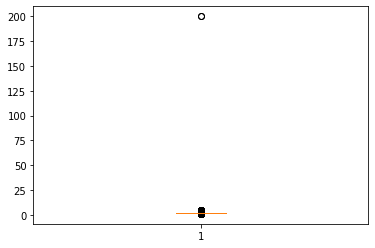

In [20]:
plt.boxplot(df_trans['PROD_QTY'], vert=True);

### *It appears that those who bought 200 chips at a go are outliers because everyone else bout between 1 to 4 chips at a time*

we can filter out these people who bought 200 chips before commencing with our analysis

In [22]:
df_trans[df_trans['PROD_QTY'] > 5]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


*It seems only a specific customer has bought over 5 chips at a time. These purchase were of the same quantity(200), brand and from the same store. It's possible this customer is reseller or just had particular party guest, hence the purchase, which is not reflective of the general clientele*

We can drop these entries from the dataset.



In [23]:
# droping entries with the ids which have qty of 200

df_trans = df_trans.drop([69762,69763],axis=0)

In [ ]:
df_pur = pd.read_csv('https://raw.githubusercontent.com/idowujames/Quantium-Virtual-Intership/main/QVI_purchase_behaviour.csv')

df_pur.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
